In [98]:
import csv
import os

csv_filename = 'population_data.csv'

# Remove old file if it exists
if os.path.exists(csv_filename):
    os.remove(csv_filename)

# Write CSV header
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Year', 'Insects', 'Birds', 'Bats', 'Plant'])

# Initialize global year counter
global_year = 1

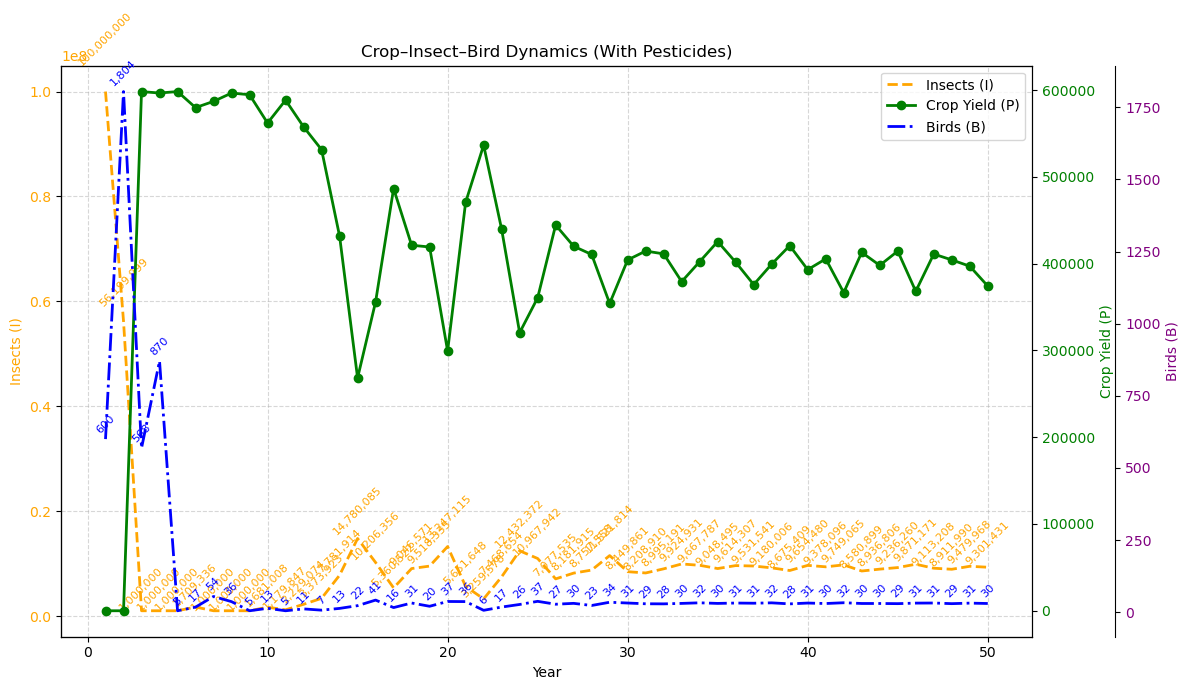

In [100]:
# STAGE 1: WITH PESTICIDES, NO BATS

import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
T = 50

# Initial populations
I = [100_000_000]         # Insects
B = [600]          # Birds
Ba = [100]         # Bats
P = []              # Crop yield

# Initial Carrying Capacity
K_I = [500_000_000]
K_B = [5000]
K_Ba = [5000]

# Parameters
alpha_IP = 0.024     # Insect damage to crops
alpha_BI = 300_000    # Bird predation rate
alpha_BaI = 826_000   # Bat predation rate


# Growth & death rates
mu_I = 3
d_I = 0.24
p_I = 0.49
#mu_B = 0.43
#mu_B = 1.43
mu_B = 3.24
d_B = 0.65

mu_Ba = 1.0
#d_Ba = 0.05
d_Ba = 0.01

# Crop yield (weather)
base_yield_mean = 618_000
base_yield_stddev = 10000

# Simulation loop
for t in range(T):
    It = I[-1]
    Bt = B[-1]
    Bat = Ba[-1]
    Kt_I = K_I[-1]
    Kt_B = K_B[-1]
    Kt_Ba = K_Ba[-1]

    # Weather-affected crop yield
    seasonal_yield = np.random.normal(base_yield_mean, base_yield_stddev)
    crop_yield = seasonal_yield - alpha_IP * It
    crop_yield = max(crop_yield, 0)
    P.append(crop_yield)

    # Insect dynamics with pesticide
    K_I_next = 0.5*((crop_yield/alpha_IP) + Kt_I)
    K_I_next = max(K_I_next, 10_000_000)
    I_next = It + (mu_I - d_I - p_I) * It * (1 - (It/K_I_next)) - alpha_BI * Bt
    I_next = max(I_next, 1_000_000)
    K_I.append(K_I_next)
    I.append(I_next)

    # Bird dynamics
    K_B_next = 0.5*((It/alpha_BI) + Kt_B)
    K_B_next = max(K_B_next, 10)
    B_next = Bt + (mu_B - d_B) * Bt * (1 - (Bt/K_B_next))
    B_next = max(B_next, 5)
    K_B.append(K_B_next)
    B.append(B_next)
    
# Save to CSV
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([
            global_year,
            I[-1],
            B[-1],
            Ba[-1],
            P[-1]
        ])
    global_year += 1

# Plotting
years = np.arange(1, T + 1)
fig, ax1 = plt.subplots(figsize = (12, 7))

# Primary Y-axis: Insects
ax1.set_xlabel('Year')
ax1.set_ylabel('Insects (I)', color='orange')
ax1.plot(years, I[:-1], label='Insects (I)', color='orange', linestyle='--', linewidth=2)
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True, linestyle='--', alpha=0.5)

# Secondary Y-axis: Crop Yield
ax2 = ax1.twinx()
ax2.set_ylabel('Crop Yield (P)', color='green')
ax2.plot(years, P, label='Crop Yield (P)', color='green', marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor='green')



# Third Y-axis: Birds and Bats
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the axis to avoid overlap
ax3.set_ylabel('Birds (B)', color='purple')
ax3.plot(years, B[:-1], label='Birds (B)', color='blue', linestyle='-.', linewidth=2)
# ax3.plot(years, Ba[:-1], label='Bats (Ba)', color='purple', linestyle='--', linewidth=2)
ax3.tick_params(axis='y', labelcolor='purple')


# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')


# Annotate insect population
for x, y in zip(years, I[:-1]):
    ax1.text(x, y + y * 0.05, f"{int(y):,}", color='orange', fontsize=8, ha='center', rotation=45)

# Annotate bird population
for x, y in zip(years, B[:-1]):
    ax3.text(x, y + 20, f"{int(y):,}", color='blue', fontsize=8, ha='center', rotation=45)

# # Annotate crop yield
# for x, y in zip(years, P):
#     ax2.text(x, y + 5, f"{y:.0f}", color='green', fontsize=8, ha='center', rotation=45)



plt.title('Crop–Insect–Bird Dynamics (With Pesticides)')
fig.tight_layout()
plt.show()



In [102]:
# Print population numbers for each year
print("\nYear | Insects       | Birds")
print("-------------------------------")
for year in range(T + 1):
    print(f"{year:4} | {int(I[year]):12,} | {int(B[year]):7,}")



Year | Insects       | Birds
-------------------------------
   0 |  100,000,000 |     600
   1 |   56,199,999 |   1,804
   2 |    1,000,000 |     568
   3 |    1,000,000 |     870
   4 |    1,000,000 |       5
   5 |    1,709,336 |      17
   6 |    1,000,000 |      54
   7 |    1,000,000 |      36
   8 |    1,000,000 |       5
   9 |    1,681,008 |      13
  10 |    1,179,847 |       5
  11 |    2,229,074 |      11
  12 |    3,373,923 |       7
  13 |    7,781,914 |      13
  14 |   14,780,085 |      22
  15 |   10,206,356 |      41
  16 |    5,360,522 |      16
  17 |    9,046,571 |      31
  18 |    9,518,335 |      20
  19 |   13,247,115 |      37
  20 |    5,651,648 |      36
  21 |    3,259,578 |       6
  22 |    7,468,654 |      17
  23 |   12,432,372 |      26
  24 |   10,967,942 |      37
  25 |    7,077,535 |      27
  26 |    8,181,915 |      30
  27 |    8,757,558 |      23
  28 |   11,521,814 |      34
  29 |    8,449,861 |      31
  30 |    8,208,910 |      29
  31 |  

In [104]:
print("\nYear | Insects CarryCap (K_I) | Birds CarryCap (K_B)")
print("------------------------------------------------------")
for year in range(T + 1):
    print(f"{year+1:4} | {K_I[year]:20,.2f} | {K_B[year]:18,.2f}")



Year | Insects CarryCap (K_I) | Birds CarryCap (K_B)
------------------------------------------------------
   1 |       500,000,000.00 |           5,000.00
   2 |       250,000,000.00 |           2,666.67
   3 |       125,000,000.00 |           1,427.00
   4 |        74,962,885.32 |             715.17
   5 |        49,911,210.51 |             359.25
   6 |        37,419,717.06 |             181.29
   7 |        30,788,914.78 |              93.49
   8 |        27,623,117.21 |              48.41
   9 |        26,240,286.22 |              25.87
  10 |        25,508,184.08 |              14.60
  11 |        24,463,255.46 |              10.10
  12 |        24,490,465.22 |              10.00
  13 |        23,863,471.97 |              10.00
  14 |        23,001,077.81 |              10.62
  15 |        20,494,560.14 |              18.28
  16 |        15,836,056.97 |              33.77
  17 |        15,334,096.03 |              33.90
  18 |        17,803,190.31 |              25.88
  19 |   

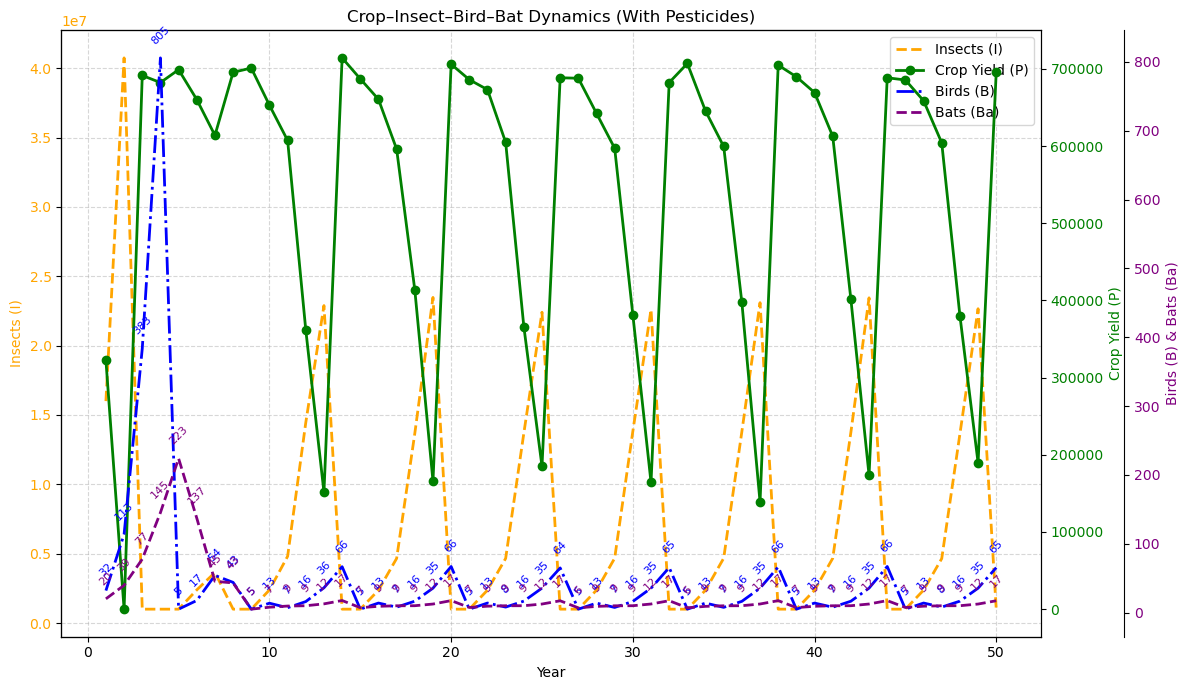

In [106]:
# STAGE 2: WITH PESTICIDES AND BATS

import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
T = 50

# Initial populations
I = [16_000_000]         # Insects
B = [32]          # Birds
Ba = [20]         # Bats
P = []              # Crop yield

# Initial Carrying Capacity
K_I = [100_000_000]
K_B = [5000]
K_Ba = [5000]

# Parameters
alpha_IP = 0.024     # Insect damage to crops
alpha_BI = 300000    # Bird predation rate
alpha_BaI = 826000   # Bat predation rate


# Growth & death rates
mu_I = 3.72
d_I = 0.24
p_I = 0.49
#mu_B = 0.43
#mu_B = 1.43
mu_B = 3.24
d_B = 0.65

mu_Ba = 1.0
#d_Ba = 0.05
d_Ba = 0.01

# Crop yield (weather)
base_yield_mean = 618000
base_yield_stddev = 10000

# Simulation loop
for t in range(T):
    It = I[-1]
    Bt = B[-1]
    Bat = Ba[-1]
    Kt_I = K_I[-1]
    Kt_B = K_B[-1]
    Kt_Ba = K_Ba[-1]

    # Weather-affected crop yield
    seasonal_yield = 1.16*np.random.normal(base_yield_mean, base_yield_stddev)
    crop_yield = seasonal_yield - alpha_IP * It
    crop_yield = max(crop_yield, 0)
    P.append(crop_yield)

    # Insect dynamics with pesticide
    K_I_next = 0.5*((crop_yield/alpha_IP) + Kt_I)
    K_I_next = max(K_I_next, 10_000_000)
    I_next = It + (mu_I - d_I - p_I) * It * (1 - (It/K_I_next)) - alpha_BI * Bt
    I_next = max(I_next, 1_000_000)
    K_I.append(K_I_next)
    I.append(I_next)

    # Bird dynamics
    K_B_next = 0.5*((It/alpha_BI) + Kt_B)
    K_B_next = max(K_B_next, 10)
    B_next = Bt + (mu_B - d_B) * Bt * (1 - (Bt/K_B_next))
    B_next = max(B_next, 5)
    K_B.append(K_B_next)
    B.append(B_next)

    # Bat dynamics
    K_Ba_next = 0.5*((It/alpha_BaI) + Kt_Ba)
    K_Ba_next = max(K_Ba_next, 10)
    Ba_next = Bat + (mu_Ba - d_Ba) * Bat * (1 - (Bat/K_Ba_next))
    Ba_next = max(Ba_next, 5)
    K_Ba.append(K_Ba_next)
    Ba.append(Ba_next)

# Save to CSV
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([
            global_year,
            I[-1],
            B[-1],
            Ba[-1],
            P[-1]
        ])
    global_year += 1
# Plotting
years = np.arange(1, T + 1)
fig, ax1 = plt.subplots(figsize = (12, 7))

# Primary Y-axis: Insects
ax1.set_xlabel('Year')
ax1.set_ylabel('Insects (I)', color='orange')
ax1.plot(years, I[:-1], label='Insects (I)', color='orange', linestyle='--', linewidth=2)
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True, linestyle='--', alpha=0.5)

# Secondary Y-axis: Crop Yield
ax2 = ax1.twinx()
ax2.set_ylabel('Crop Yield (P)', color='green')
ax2.plot(years, P, label='Crop Yield (P)', color='green', marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor='green')



# Third Y-axis: Birds and Bats
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the axis to avoid overlap
ax3.set_ylabel('Birds (B) & Bats (Ba)', color='purple')
ax3.plot(years, B[:-1], label='Birds (B)', color='blue', linestyle='-.', linewidth=2)
ax3.plot(years, Ba[:-1], label='Bats (Ba)', color='purple', linestyle='--', linewidth=2)
ax3.tick_params(axis='y', labelcolor='purple')


# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

# # Annotate insect population
# for x, y in zip(years, I[:-1]):
#     ax1.text(x, y + y * 0.05, f"{int(y):,}", color='orange', fontsize=8, ha='center', rotation=45)

# Annotate bird population
for x, y in zip(years, B[:-1]):
    ax3.text(x, y + 20, f"{int(y):,}", color='blue', fontsize=8, ha='center', rotation=45)

# Annotate bat population
for x, y in zip(years, Ba[:-1]):
    ax3.text(x, y + 20, f"{int(y):,}", color='purple', fontsize=8, ha='center', rotation=45)

# # Annotate crop yield
# for x, y in zip(years, P):
#     ax2.text(x, y + 5, f"{y:.0f}", color='green', fontsize=8, ha='center', rotation=45)



plt.title('Crop–Insect–Bird–Bat Dynamics (With Pesticides)')
fig.tight_layout()
plt.show()



In [108]:
# Print population numbers for each year
print("\nYear | Insects       | Birds")
print("-------------------------------")
for year in range(T + 1):
    print(f"{year:4} | {int(I[year]):12,} | {int(B[year]):7,} | {int(Ba[year]):7,}")



Year | Insects       | Birds
-------------------------------
   0 |   16,000,000 |      32 |      20
   1 |   40,743,385 |     113 |      39
   2 |    1,000,000 |     383 |      77
   3 |    1,000,000 |     805 |     145
   4 |    1,000,000 |       5 |     223
   5 |    2,386,253 |      17 |     137
   6 |    3,646,450 |      54 |      45
   7 |    1,000,000 |      43 |      43
   8 |    1,000,000 |       5 |       5
   9 |    2,385,363 |      13 |       7
  10 |    4,809,158 |       7 |       9
  11 |   14,458,212 |      16 |       9
  12 |   22,887,113 |      36 |      12
  13 |    1,000,000 |      66 |      17
  14 |    1,000,000 |       5 |       7
  15 |    2,371,123 |      13 |       9
  16 |    4,658,556 |       7 |       9
  17 |   13,675,401 |      16 |       9
  18 |   23,474,820 |      35 |      12
  19 |    1,000,000 |      66 |      17
  20 |    1,000,000 |       5 |       7
  21 |    2,371,313 |      13 |       9
  22 |    4,659,988 |       8 |       9
  23 |   13,684,39

In [110]:
print("\nYear | Insects CarryCap (K_I) | Birds CarryCap (K_B) | Bats ")
print("------------------------------------------------------")
for year in range(T + 1):
    print(f"{year+1:4} | {K_I[year]:20,.2f} | {K_B[year]:18,.2f} | {K_Ba[year]:18,.2f}")


Year | Insects CarryCap (K_I) | Birds CarryCap (K_B) | Bats 
------------------------------------------------------
   1 |       100,000,000.00 |           5,000.00 |           5,000.00
   2 |        56,713,480.16 |           2,526.67 |           2,509.69
   3 |        28,356,740.08 |           1,331.24 |           1,279.51
   4 |        28,586,711.40 |             667.29 |             640.36
   5 |        28,509,954.56 |             335.31 |             320.78
   6 |        28,820,324.46 |             169.32 |             161.00
   7 |        28,168,417.49 |              88.64 |              81.94
   8 |        26,875,950.62 |              50.40 |              43.18
   9 |        27,932,507.17 |              26.86 |              22.19
  10 |        28,575,131.26 |              15.10 |              11.70
  11 |        27,892,721.76 |              11.53 |              10.00
  12 |        26,600,858.05 |              13.78 |              10.00
  13 |        20,836,610.57 |              

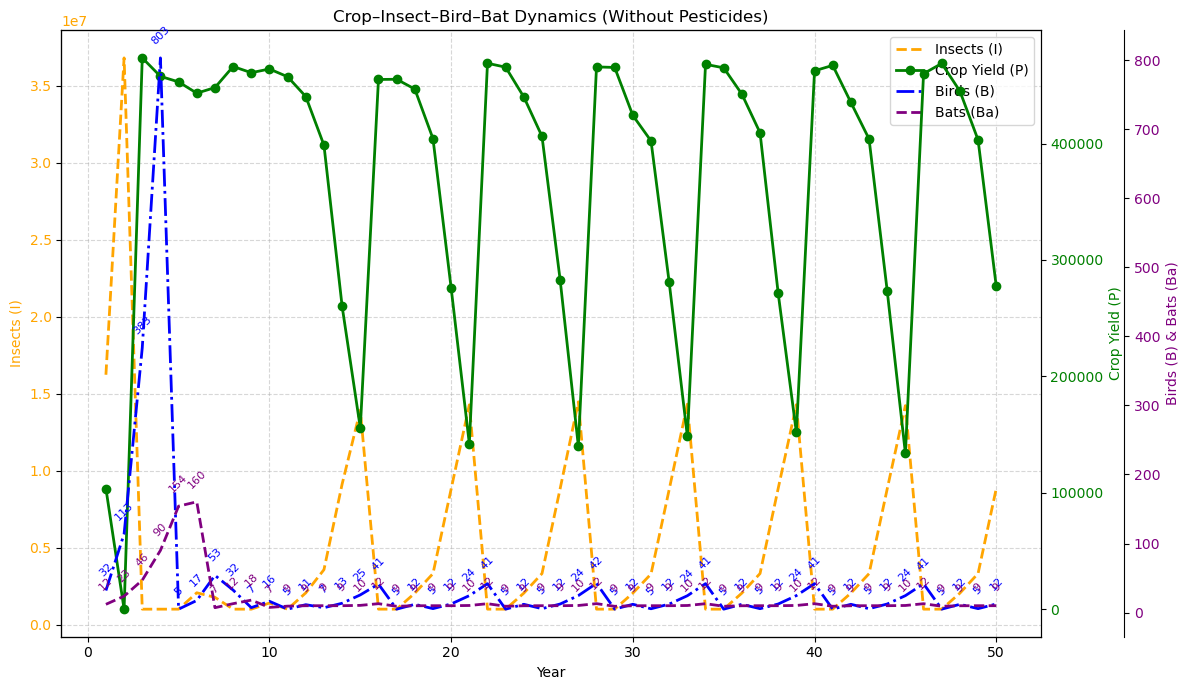

In [112]:
# STAGE 3: WITH BATS, NO PESTICIDES

import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
T = 50

# Initial populations
I = [16226652]         # Insects
B = [32]          # Birds
Ba = [12]         # Bats
P = []              # Crop yield

# Initial Carrying Capacity
K_I = [100_000_000]
K_B = [5000]
K_Ba = [5000]

# Parameters
alpha_IP = 0.024     # Insect damage to crops
alpha_BI = 300000    # Bird predation rate
alpha_BaI = 826000   # Bat predation rate


# Growth & death rates
mu_I = 3
d_I = 0.3
p_I = 0
#mu_B = 0.43
#mu_B = 1.43
mu_B = 3.24
d_B = 0.65

mu_Ba = 1.0
#d_Ba = 0.05
d_Ba = 0.01

# Crop yield (weather)
base_yield_mean = 618000
base_yield_stddev = 10000

# Simulation loop
for t in range(T):
    It = I[-1]
    Bt = B[-1]
    Bat = Ba[-1]
    Kt_I = K_I[-1]
    Kt_B = K_B[-1]
    Kt_Ba = K_Ba[-1]

    # Weather-affected crop yield
    seasonal_yield = np.random.normal(base_yield_mean, base_yield_stddev)
    crop_yield = 0.788*seasonal_yield - alpha_IP * It
    crop_yield = max(crop_yield, 0)
    P.append(crop_yield)

    # Insect dynamics with pesticide
    K_I_next = 0.5*((crop_yield/alpha_IP) + Kt_I)
    K_I_next = max(K_I_next, 10_000_000)
    I_next = It + (mu_I - d_I - p_I) * It * (1 - (It/K_I_next)) - alpha_BI * Bt
    I_next = max(I_next, 1_000_000)
    K_I.append(K_I_next)
    I.append(I_next)

    # Bird dynamics
    K_B_next = 0.5*((It/alpha_BI) + Kt_B)
    K_B_next = max(K_B_next, 10)
    B_next = Bt + (mu_B - d_B) * Bt * (1 - (Bt/K_B_next))
    B_next = max(B_next, 5)
    K_B.append(K_B_next)
    B.append(B_next)

    # Bat dynamics #1.082
    K_Ba_next = 0.5*((It/alpha_BaI) + Kt_Ba)
    K_Ba_next = max(K_Ba_next, 10)
    Ba_next = Bat + (mu_Ba - d_Ba) * Bat * (1 - (Bat/K_Ba_next))
    Ba_next = max(Ba_next, 5)
    K_Ba.append(K_Ba_next)
    Ba.append(Ba_next)
# Save to CSV
    with open(csv_filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([
            global_year,
            I[-1],
            B[-1],
            Ba[-1],
            P[-1]
        ])
    global_year += 1
# Plotting
years = np.arange(1, T + 1)
fig, ax1 = plt.subplots(figsize = (12, 7))

# Primary Y-axis: Insects
ax1.set_xlabel('Year')
ax1.set_ylabel('Insects (I)', color='orange')
ax1.plot(years, I[:-1], label='Insects (I)', color='orange', linestyle='--', linewidth=2)
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True, linestyle='--', alpha=0.5)

# Secondary Y-axis: Crop Yield
ax2 = ax1.twinx()
ax2.set_ylabel('Crop Yield (P)', color='green')
ax2.plot(years, P, label='Crop Yield (P)', color='green', marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor='green')



# Third Y-axis: Birds and Bats
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the axis to avoid overlap
ax3.set_ylabel('Birds (B) & Bats (Ba)', color='purple')
ax3.plot(years, B[:-1], label='Birds (B)', color='blue', linestyle='-.', linewidth=2)
ax3.plot(years, Ba[:-1], label='Bats (Ba)', color='purple', linestyle='--', linewidth=2)
ax3.tick_params(axis='y', labelcolor='purple')


# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

# # Annotate insect population
# for x, y in zip(years, I[:-1]):
#     ax1.text(x, y + y * 0.05, f"{int(y):,}", color='orange', fontsize=8, ha='center', rotation=45)

# Annotate bird population
for x, y in zip(years, B[:-1]):
    ax3.text(x, y + 20, f"{int(y):,}", color='blue', fontsize=8, ha='center', rotation=45)

# Annotate bat population
for x, y in zip(years, Ba[:-1]):
    ax3.text(x, y + 20, f"{int(y):,}", color='purple', fontsize=8, ha='center', rotation=45)

# # Annotate crop yield
# for x, y in zip(years, P):
#     ax2.text(x, y + 5, f"{y:.0f}", color='green', fontsize=8, ha='center', rotation=45)



plt.title('Crop–Insect–Bird–Bat Dynamics (Without Pesticides)')
fig.tight_layout()
plt.show()



In [114]:
# Print population numbers for each year
print("\nYear | Insects       | Birds")
print("-------------------------------")
for year in range(T + 1):
    print(f"{year:4} | {int(I[year]):12,} | {int(B[year]):7,} | {int(Ba[year]):7,}")



Year | Insects       | Birds
-------------------------------
   0 |   16,226,652 |      32 |      12
   1 |   36,808,735 |     113 |      23
   2 |    1,000,000 |     383 |      46
   3 |    1,000,000 |     803 |      90
   4 |    1,000,000 |       5 |     154
   5 |    2,064,531 |      17 |     160
   6 |    1,769,661 |      53 |       7
   7 |    1,000,000 |      32 |      12
   8 |    1,000,000 |       7 |      18
   9 |    1,399,252 |      16 |       7
  10 |    1,000,000 |       5 |       9
  11 |    2,059,082 |      11 |       9
  12 |    3,565,719 |       7 |       9
  13 |    9,124,233 |      13 |       9
  14 |   13,929,889 |      25 |      10
  15 |    1,000,000 |      41 |      12
  16 |    1,000,000 |       5 |       9
  17 |    2,039,451 |      12 |       9
  18 |    3,311,010 |       5 |       9
  19 |    8,805,369 |      12 |       9
  20 |   14,273,052 |      24 |      10
  21 |    1,000,000 |      41 |      12
  22 |    1,000,000 |       5 |       9
  23 |    2,042,32

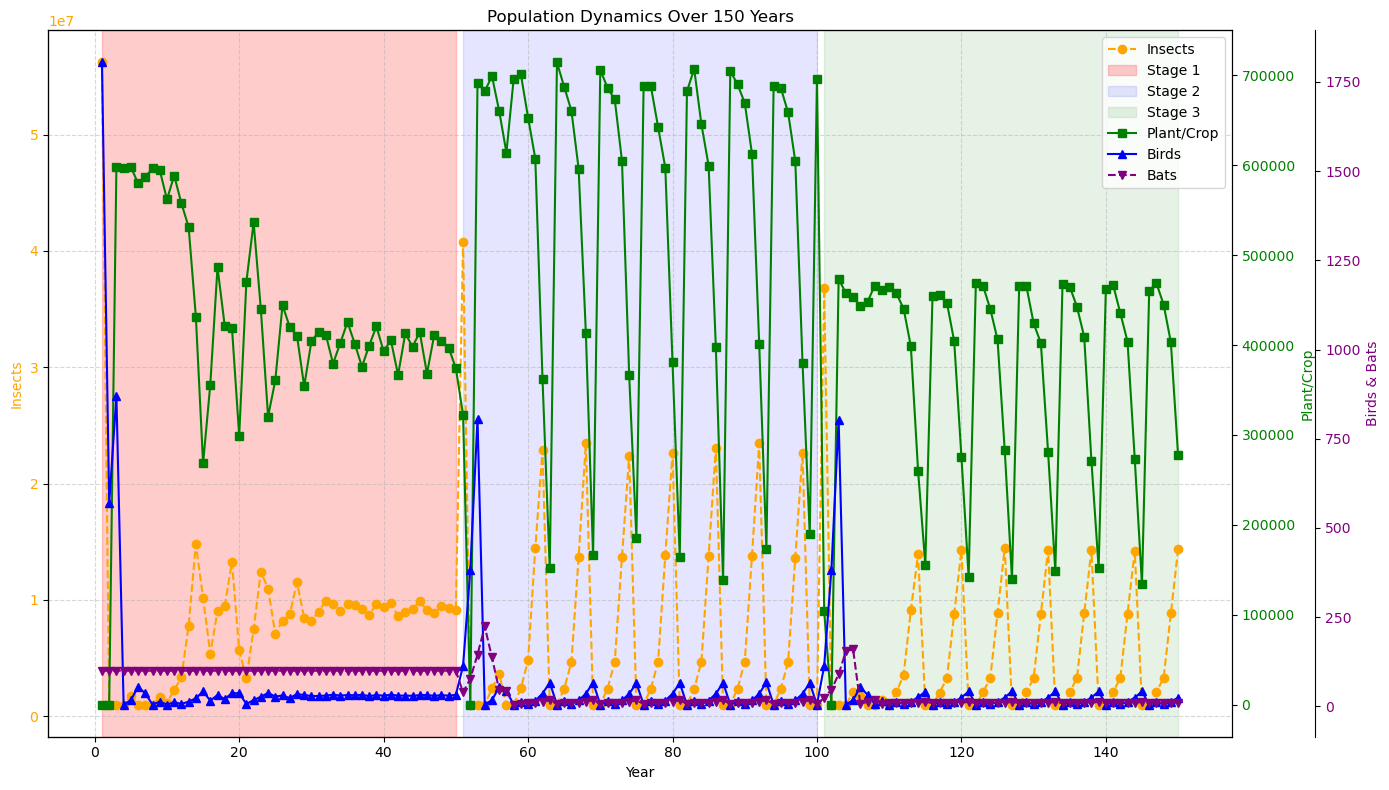

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(csv_filename)

years = data['Year']


fig, ax1 = plt.subplots(figsize=(14, 8))


ax1.set_xlabel('Year')
ax1.set_ylabel('Insects', color='orange')
ax1.plot(years, data['Insects'], label='Insects', color='orange', linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(True, linestyle='--', alpha=0.5)


ax2 = ax1.twinx()
ax2.set_ylabel('Plant/Crop', color='green')
ax2.plot(years, data['Plant'], label='Plant/Crop', color='green', linestyle='-', marker='s')
ax2.tick_params(axis='y', labelcolor='green')


ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Birds & Bats', color='purple')
ax3.plot(years, data['Birds'], label='Birds', color='blue', linestyle='-', marker='^')
ax3.plot(years, data['Bats'], label='Bats', color='purple', linestyle='--', marker='v')
ax3.tick_params(axis='y', labelcolor='purple')


ax1.axvspan(1, 50, color='red', alpha=0.2, label='Stage 1')
ax1.axvspan(51, 100, color='blue', alpha=0.1, label='Stage 2')
ax1.axvspan(101, 150, color='green', alpha=0.1, label='Stage 3')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.title('Population Dynamics Over 150 Years')
fig.tight_layout()
plt.show()

In [118]:
print(global_year)

151


In [120]:
csv_filename

'population_data.csv'

In [17]:
import pandas as pd


pop_df = pd.read_csv('population_data.csv')

# Display the first few rows
print(pop_df.head())


   Year       Insects        Birds   Bats          Plant
0     1  5.620000e+07  1804.350000  100.0       0.000000
1     2  1.000000e+06   568.570663  100.0       0.000000
2     3  1.000000e+06   870.426153  100.0  598218.495373
3     4  1.000000e+06     5.000000  100.0  596628.856569
4     5  1.709337e+06    17.592841  100.0  598277.366628


In [21]:
#stage 2
print(max(pop_df[51:100]["Insects"]))
print(max(pop_df[51:100]["Birds"]))
print((pop_df[51:100]["Bats"]).mean())

print((pop_df[51:100]["Insects"]).mean())

print("The mean plant pop:" + str(pop_df[51:100]["Plant"].mean())+ "the standard deviation is: " + str(pop_df[51:100]["Plant"].std()))

23474820.783312835
805.8839782954626
23.238938760771603
6772140.152147679
The mean plant pop:540154.878405292the standard deviation is: 204692.01545286324


In [47]:

# stage 1 is years 0 to 50
stage1 = pop_df[0:50]

# Create summary data
stage1_summary = pd.DataFrame({
    "Category": ["Birds", "Bats", "Insects", "Crops"],
    "Mean": [
        round(stage1["Birds"].mean(), 2),
        round(stage1["Bats"].mean(), 2),
        round(stage1["Insects"].mean(), 2),
        round(stage1["Plant"].mean(), 2)
    ],
    "Standard Deviation": [
        round(stage1["Birds"].std(), 2),
        round(stage1["Bats"].std(), 2),
        round(stage1["Insects"].std(), 2),
        round(stage1["Plant"].std(), 2)
    ],
    "Max": [
        stage1["Birds"].max(),
        stage1["Bats"].max(),
        stage1["Insects"].max(),
        stage1["Plant"].max()
    ]
})


print("Stage 1")
print(stage1_summary.to_string(index=False))




Stage 1
Category       Mean  Standard Deviation          Max
   Birds      90.08              284.63 1.804350e+03
    Bats     100.00                0.00 1.000000e+02
 Insects 8406308.53          7806288.12 5.620000e+07
   Crops  424193.53           122720.04 5.982774e+05


In [43]:
#stage 2 is years 51-100
stage2 = pop_df[51:100]

# Create summary data
stage2_summary = pd.DataFrame({
    "Category": ["Birds", "Bats", "Insects", "Crops"],
    "Mean": [
        round(stage2["Birds"].mean(), 2),
        round(stage2["Bats"].mean(), 2),
        round(stage2["Insects"].mean(), 2),
        round(stage2["Plant"].mean(), 2)
    ],
    "Standard Deviation": [
        round(stage2["Birds"].std(), 2),
        round(stage2["Bats"].std(), 2),
        round(stage2["Insects"].std(), 2),
        round(stage2["Plant"].std(), 2)
    ],
    "Max": [
        stage2["Birds"].max(),
        stage2["Bats"].max(),
        stage2["Insects"].max(),
        stage2["Plant"].max()
    ]
})


print("Stage 2")
print(stage2_summary.to_string(index=False))

Stage 2
Category       Mean  Standard Deviation          Max
   Birds      47.50              123.69 8.058840e+02
    Bats      23.24               40.60 2.239260e+02
 Insects 6772140.15          7916235.88 2.347482e+07
   Crops  540154.88           204692.02 7.143859e+05


In [41]:
#stage 2 is years 100-150
stage3 = pop_df[100:150]

# Create summary data
stage3_summary = pd.DataFrame({
    "Category": ["Birds", "Bats", "Insects", "Crops"],
    "Mean": [
        round(stage3["Birds"].mean(), 2),
        round(stage3["Bats"].mean(), 2),
        round(stage3["Insects"].mean(), 2),
        round(stage3["Plant"].mean(), 2)
    ],
    "Standard Deviation": [
        round(stage3["Birds"].std(), 2),
        round(stage3["Bats"].std(), 2),
        round(stage3["Insects"].std(), 2),
        round(stage3["Plant"].std(), 2)
    ],
    "Max": [
        stage3["Birds"].max(),
        stage3["Bats"].max(),
        stage3["Insects"].max(),
        stage3["Plant"].max()
    ]
})


print("Stage 3")
print(stage3_summary.to_string(index=False))

Stage 3
Category       Mean  Standard Deviation          Max
   Birds      42.11              122.73 8.030752e+02
    Bats      18.90               31.15 1.603759e+02
 Insects 5192522.35          6570490.47 3.680874e+07
   Crops  369813.58           127297.74 4.735769e+05
